In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
%matplotlib inline

import cv2
import time
import itertools
import random

from sklearn.utils import shuffle

from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.layers import Conv2D, ZeroPadding2D, Activation, Input, concatenate, Dropout,GlobalAveragePooling2D
from keras.models import Model

from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Concatenate
from keras.layers import Lambda, Flatten, Dense
from keras.initializers import glorot_uniform

from keras.layers import Layer
from keras.regularizers import l2
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau



In [ ]:
dir_list = next(os.walk('/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi'))[1]
#dir_list


In [ ]:
dir_list.sort()
#dir_list

In [ ]:
orig_groups, forg_groups = [], []
for directory in dir_list:
    images = os.listdir('/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/'+directory)
    images.sort()
    images = ['/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/'+directory+'/'+x for x in images]
    forg_groups.append(images[:30])
    orig_groups.append(images[30:])

In [ ]:
len(orig_groups), len(forg_groups)

(160, 160)

In [ ]:
orig_groups[0]

['/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/1/H-S-1-G-01.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/1/H-S-1-G-02.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/1/H-S-1-G-03.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/1/H-S-1-G-04.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/1/H-S-1-G-05.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/1/H-S-1-G-06.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/1/H-S-1-G-07.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/1/H-S-1-G-08.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/1/H-S-1-G-09.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/1/H-S-1-G-10.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/1/H-S-1-G-11.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/1/H-S-1-G-12.tif',
 '/content/drive

In [ ]:
forg_groups[1]

['/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/10/H-S-10-F-01.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/10/H-S-10-F-02.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/10/H-S-10-F-03.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/10/H-S-10-F-04.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/10/H-S-10-F-05.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/10/H-S-10-F-06.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/10/H-S-10-F-07.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/10/H-S-10-F-08.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/10/H-S-10-F-09.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/10/H-S-10-F-10.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/10/H-S-10-F-11.tif',
 '/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/10/H-S-10-F-1

In [ ]:
orig_lengths = [len(x) for x in orig_groups]
forg_lengths = [len(x) for x in forg_groups]

In [ ]:
print(orig_lengths)

[24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 33, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 33, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24]


In [ ]:
print(forg_lengths)

[30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]


In [ ]:
orig_train, orig_val, orig_test = orig_groups[:120], orig_groups[120:140], orig_groups[140:]
forg_train, forg_val, forg_test = forg_groups[:120], forg_groups[120:140], forg_groups[140:]

In [ ]:
del orig_groups, forg_groups

In [ ]:
img_h, img_w = 155, 220

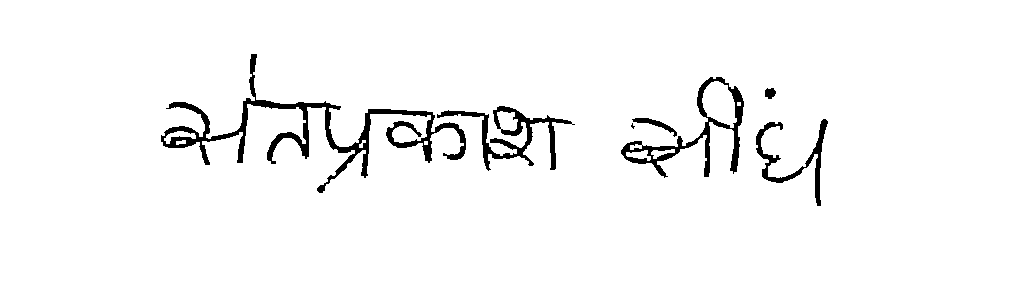

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def harris_corner_detection(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate the Harris corner response
    corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    corners = cv2.dilate(corners, None)


    # Threshold the corners
    img_corners = np.copy(image)
    img_corners[corners > 0.1* corners.max()] = [255, 255, 255]  # Mark corners with red color

    return img_corners

# Load the image
image = cv2.imread('/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/100/H-S-100-F-12.tif')

# Apply Harris corner detection
result = harris_corner_detection(image)
result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)

# Display the result
cv2_imshow(result)


In [ ]:
# import cv2
# import numpy as np

# def harris_corners(image, block_size=2, ksize=3, k=0.04, threshold=0.1):
#     gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     gray = np.float32(gray)

#     # Apply Harris Corner Detection
#     corners = cv2.cornerHarris(gray, block_size, ksize, k)
#     corners = cv2.dilate(corners, None)

#     # Threshold the corners
#     img_corners = np.copy(image)
#     img_corners[corners > threshold * corners.max()] = [0, 0, 255]  # Mark corners with red color
#     return img_corners




import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def harris_corners(image):
    # Convert the image to grayscale
    #img = cv2.imread(image)
    #gray = cv2.imread(image)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    # Calculate the Harris corner response
    corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    corners = cv2.dilate(corners, None)

    # Threshold the corners
    #img_corners = np.copy(image)
    image[corners > 0.1 * corners.max()] = [255, 255, 255]  # Mark corners with red color

    return image

In [ ]:
import matplotlib.pyplot as plt
def visualize_sample_signature():
  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 15))
  k = np.random.randint(len(orig_train))
  orig_img_names = random.sample(orig_train[k], 2)
  forg_img_name = random.sample(forg_train[k], 1)
  print(orig_img_names[0])

  orig_img1 = cv2.imread(orig_img_names[0], 0)
  orig_img2 = cv2.imread(orig_img_names[1], 0)
  forg_img = cv2.imread(forg_img_name[0], 0)
  i1 = cv2.imread(orig_img_names[0])
  i2 = cv2.imread(orig_img_names[1])
  f1 = cv2.imread(forg_img_name[0])
  h1 = harris_corners(i1)
  h2 = harris_corners(i2)
  h3 = harris_corners(f1)
  orig_img1 = cv2.resize(orig_img1, (img_w, img_h))
  orig_img2 = cv2.resize(orig_img2, (img_w, img_h))
  forg_img = cv2.resize(forg_img, (img_w, img_h))

  ax1.imshow(h1)
  ax2.imshow(h2)
  ax3.imshow(h3)
  # ax1.imshow(orig_img1, cmap = 'gray')
  # ax2.imshow(orig_img2, cmap = 'gray')
  # ax3.imshow(forg_img, cmap = 'gray')

  ax1.set_title('Genuine Copy')
  ax1.axis('off')
  ax2.set_title('Genuine Copy')
  ax2.axis('off')
  ax3.set_title('Forged Copy')
  ax3.axis('off')
  plt.show()

/content/drive/MyDrive/Dataset/BHSig260-Hindi/BHSig260-Hindi/28/H-S-28-G-22.tif


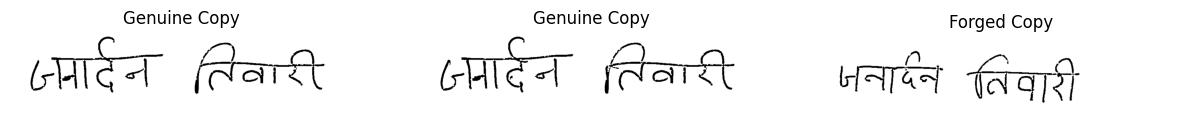

In [ ]:
visualize_sample_signature()

In [ ]:
def generate_batch(orig_groups, forg_groups, batch_size = 32):
    while True:
        orig_pairs = []
        forg_pairs = []
        gen_gen_labels = []
        gen_for_labels = []
        all_pairs = []
        all_labels = []

        for orig, forg in zip(orig_groups, forg_groups):
            orig_pairs.extend(list(itertools.combinations(orig, 2)))
            for i in range(len(forg)):
                forg_pairs.extend(list(itertools.product(orig[i:i+1], random.sample(forg, 12))))

        gen_gen_labels = [1]*len(orig_pairs)
        gen_for_labels = [0]*len(forg_pairs)

        all_pairs = orig_pairs + forg_pairs
        all_labels = gen_gen_labels + gen_for_labels
        del orig_pairs, forg_pairs, gen_gen_labels, gen_for_labels
        all_pairs, all_labels = shuffle(all_pairs, all_labels)


        k = 0
        pairs=[np.zeros((batch_size, img_h, img_w, 1)) for i in range(2)]

        targets=np.zeros((batch_size,))

        for ix, pair in enumerate(all_pairs):
            img1 = cv2.imread(pair[0])
            img2 = cv2.imread(pair[1])
            img1 = harris_corners(img1)
            img2 = harris_corners(img2)
            img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
            img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
            img1 = cv2.resize(img1, (img_w, img_h))
            img2 = cv2.resize(img2, (img_w, img_h))
            img1 = np.array(img1, dtype = np.float64)
            img2 = np.array(img2, dtype = np.float64)
            img1 /= 255
            img2 /= 255
            img1 = img1[..., np.newaxis]
            img2 = img2[..., np.newaxis]
            pairs[0][k, :, :, :] = img1
            pairs[1][k, :, :, :] = img2
            targets[k] = all_labels[ix]
            k += 1
            if k == batch_size:
                yield pairs, targets
                k = 0
                pairs=[np.zeros((batch_size, img_h, img_w, 1)) for i in range(2)]
                targets=np.zeros((batch_size,))

    return pairs, targets

In [ ]:
def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.sum(K.square(x - y), axis=1, keepdims=True))

In [ ]:
def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)

In [ ]:
def contrastive_loss(y_true, y_pred):
    margin = 1
    return K.mean(y_true * K.square(y_pred) + (1 - y_true) * K.square(K.maximum(margin - y_pred, 0)))
def accuracy(y_true, y_pred):
    return K.mean(K.equal(y_true, K.cast(y_pred < 0.5, y_true.dtype)))


In [ ]:
def h_c(image):
    # Convert the image to grayscale
    #img = cv2.imread(image)
    #gray = cv2.imread(image)

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    # Calculate the Harris corner response
    corners = cv2.cornerHarris(gray, blockSize=2, ksize=3, k=0.04)
    corners = cv2.dilate(corners, None)

    # Threshold the corners
    #img_corners = np.copy(image)
    image[corners > 0.1 * corners.max()] = [0, 255, 0]  # Mark corners with red color

    return image

In [ ]:
def create_base_network_signet(input_shape):

    seq = Sequential()
    seq.add(Conv2D(96, kernel_size=(11, 11), activation='relu', name='conv1_1', strides=4, input_shape= input_shape))
    seq.add(BatchNormalization())
    seq.add(MaxPooling2D((2,2), strides=(1,1)))
    seq.add(Dropout(0.3))

    seq.add(Conv2D(256, kernel_size=(5, 5), activation='relu', name='conv2_1'))
    seq.add(BatchNormalization())
    seq.add(MaxPooling2D((2,2), strides=(1,1)))
    seq.add(Dropout(0.3))

    seq.add(Conv2D(512, kernel_size=(3, 3), activation='relu', name='conv3_1'))
    seq.add(MaxPooling2D((2,2), strides=(1,1)))
    seq.add(Dropout(0.3))

    seq.add(GlobalAveragePooling2D())
    seq.add(Dense(128, activation='relu'))



    # #Harris Implementation
    # corner_input=Input(shape = input_shape)
    # corner_layer = Lambda(lambda x: tf.map_fn(harris_corners, x))(corner_input)

    # # Concatenate the corner response with the output of the CNN layers
    # combined_layer = Concatenate()([model.output, corner_layer])
    # output_layer = Dense(10, activation='softmax')(combined_layer)

    # # Create the model with both image input and corner input
    # model = Model(inputs=[model.input, corner_input], outputs=output_layer)
    return seq

In [ ]:
input_shape=(img_h, img_w, 1)
input_shape

(155, 220, 1)

In [ ]:

base_network = create_base_network_signet(input_shape)

input_a = Input(shape=(input_shape))
input_b = Input(shape=(input_shape))

processed_a = base_network(input_a)
processed_b = base_network(input_b)

distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([processed_a, processed_b])

model = Model(inputs=[input_a, input_b], outputs=distance)
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 155, 220, 1  0           []                               
                                )]                                                                
                                                                                                  
 input_2 (InputLayer)           [(None, 155, 220, 1  0           []                               
                                )]                                                                
                                                                                                  
 sequential (Sequential)        (None, 128)          1873600     ['input_1[0][0]',                
                                                                  'input_2[0][0]']            

In [ ]:
batch_sz = 128
num_train_samples = 276*120 + 24 * 12 *120
num_val_samples = num_test_samples = 276*20 + 288*20
num_train_samples, num_val_samples, num_test_samples

(67680, 11280, 11280)

In [ ]:
rms = RMSprop(learning_rate=1e-4)
model.compile(loss=contrastive_loss, optimizer=rms,metrics=[accuracy])

In [ ]:
callbacks = [
    EarlyStopping(patience=3, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=2, min_lr=0.000001, verbose=1),
    ModelCheckpoint('./signet.h5', verbose=1, save_weights_only=True)
]

In [ ]:
results = model.fit(generate_batch(orig_train, forg_train, batch_sz),
                              steps_per_epoch = num_train_samples//batch_sz,
                              epochs = 3,
                              validation_data = generate_batch(orig_val, forg_val, batch_sz),
                              validation_steps = num_val_samples//batch_sz,
                              callbacks = callbacks)

Epoch 1/3
528/528 [==============================] - ETA: 0s - loss: 0.1092 - accuracy: 0.8758
Epoch 1: saving model to ./signet.h5
528/528 [==============================] - 3509s 7s/step - loss: 0.1092 - accuracy: 0.8758 - val_loss: 0.1343 - val_accuracy: 0.8452 - lr: 1.0000e-04
Epoch 2/3
528/528 [==============================] - ETA: 0s - loss: 0.0478 - accuracy: 0.9666
Epoch 2: saving model to ./signet.h5
528/528 [==============================] - 1335s 3s/step - loss: 0.0478 - accuracy: 0.9666 - val_loss: 0.1247 - val_accuracy: 0.8339 - lr: 1.0000e-04
Epoch 3/3
528/528 [==============================] - ETA: 0s - loss: 0.0262 - accuracy: 0.9898
Epoch 3: saving model to ./signet.h5
528/528 [==============================] - 1336s 3s/step - loss: 0.0262 - accuracy: 0.9898 - val_loss: 0.1232 - val_accuracy: 0.8279 - lr: 1.0000e-04


In [ ]:
df_new = pd.DataFrame([1,2])
df_new.head()
df_new.to_csv("test.csv",index=False)

In [ ]:
def plot_training(H, plotPath):

	plt.style.use("ggplot")
	plt.figure()
	plt.plot(H.history["loss"], label="train_loss")
	plt.plot(H.history["val_loss"], label="val_loss")
	plt.plot(H.history["accuracy"], label="train_acc")
	plt.plot(H.history["val_accuracy"], label="val_acc")
	plt.title("Training Loss and Accuracy")
	plt.xlabel("Epoch #")
	plt.ylabel("Loss/Accuracy")
	plt.legend(loc="lower left")



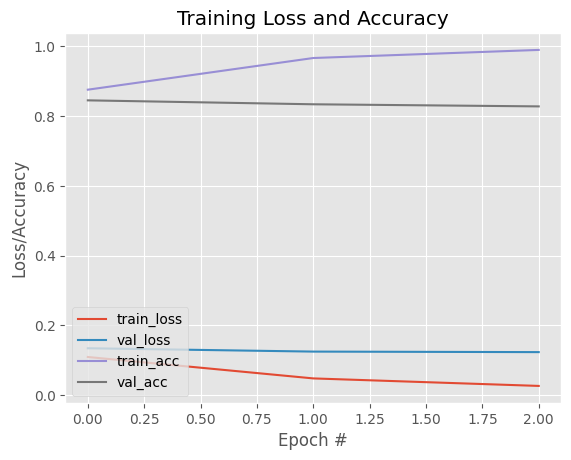

In [ ]:
plot_training(results, "None")

In [ ]:
def compute_accuracy_roc(predictions, labels):

    dmax = np.max(predictions)
    dmin = np.min(predictions)
    nsame = np.sum(labels == 1)
    ndiff = np.sum(labels == 0)

    step = 0.01
    max_acc = 0
    best_thresh = -1

    for d in np.arange(dmin, dmax+step, step):
        idx1 = predictions.ravel() <= d
        idx2 = predictions.ravel() > d

        tpr = float(np.sum(labels[idx1] == 1)) / nsame
        tnr = float(np.sum(labels[idx2] == 0)) / ndiff
        acc = 0.5 * (tpr + tnr)

        if (acc > max_acc):
            max_acc, best_thresh = acc, d

    return max_acc, best_thresh

In [ ]:
model.load_weights('signet.h5')

In [ ]:
import time
s = time.time()

In [ ]:
test_gen = generate_batch(orig_test[0:2], forg_test[0:2], 1)
pred, tr_y = [], []
for i in range(num_test_samples):
    (img1, img2), label = next(test_gen)
    tr_y.append(label)
    pred.append(model.predict([img1, img2])[0][0])
e =time.time()
print((e-s)/60," minutes")

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 27ms/step
19.842178209622702  minutes


In [ ]:
tr_acc, threshold = compute_accuracy_roc(np.array(pred), np.array(tr_y))
tr_acc, threshold

(0.8432555857487922, 0.4)

In [ ]:
threshold = 0.5

In [ ]:
test_gen = generate_batch(orig_test, forg_test, 1)
def predict_score():
    test_point, test_label = next(test_gen)
    img1, img2 = test_point[0], test_point[1]

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
    ax1.imshow(np.squeeze(img1), cmap='gray')
    ax2.imshow(np.squeeze(img2), cmap='gray')
    ax1.set_title('Genuine')
    if test_label == 1:
        ax2.set_title('Genuine')
    else:
        ax2.set_title('Forged')
    ax1.axis('off')
    ax2.axis('off')
    plt.show()
    result = model.predict([img1, img2])
    diff = result[0][0]
    print("Difference Score = ", diff)
    if diff > threshold:
        print("Its a Forged Signature")
    else:
        print("Its a Genuine Signature")

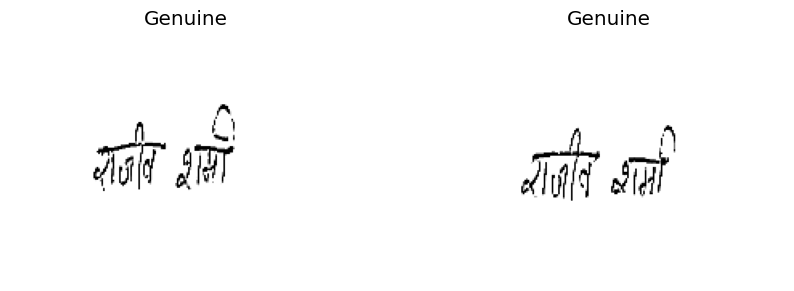

1/1 [==============================] - 0s 20ms/step
Difference Score =  0.12146419
Its a Genuine Signature


In [ ]:
predict_score()

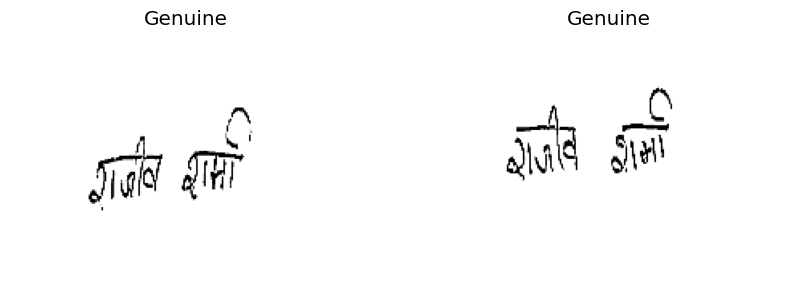

1/1 [==============================] - 0s 22ms/step
Difference Score =  0.27015543
Its a Genuine Signature


In [ ]:
predict_score()

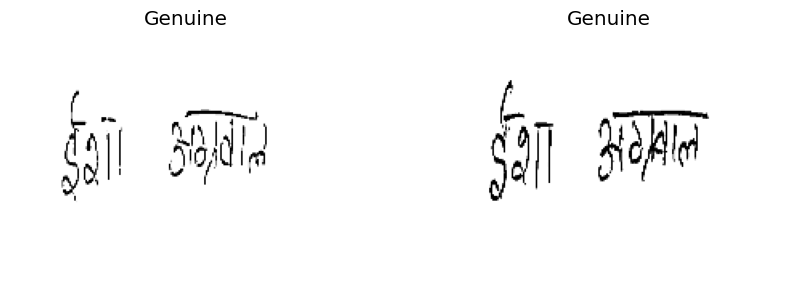

1/1 [==============================] - 0s 19ms/step
Difference Score =  0.22881274
Its a Genuine Signature


In [ ]:
predict_score()

In [ ]:
#Testing manually
pairs=[np.zeros((1, img_h, img_w, 1)) for i in range(2)]
#targets=np.zeros((batch_size,))
img1 = cv2.imread("/content/drive/MyDrive/g.jpeg")
img2 = cv2.imread("/content/drive/MyDrive/f.jpeg")
img1 = harris_corners(img1)
img2 = harris_corners(img2)
img1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
img2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
img1 = cv2.resize(img1, (155,220))
img2 = cv2.resize(img2, (155,220))
img1 = np.array(img1, dtype = np.float64)
img2 = np.array(img2, dtype = np.float64)
img1 /= 255
img2 /= 255
img1 = img1[..., np.newaxis]
img2 = img2[..., np.newaxis]


pred, tr_y = [], []
tr_y = 1
model.predict([np.expand_dims(img1, axis=0), np.expand_dims(img2, axis=0)])[0][0]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 10))
ax1.imshow(np.squeeze(img1), cmap='gray')
ax2.imshow(np.squeeze(img2), cmap='gray')
ax1.set_title('Genuine')
if tr_y == 1:
    ax2.set_title('Genuine')
else:
    ax2.set_title('Forged')
ax1.axis('off')
ax2.axis('off')
plt.show()
result = model.predict([np.expand_dims(img1, axis=0), np.expand_dims(img2, axis=0)])
diff = result[0][0]
print("Difference Score = ", diff)
if diff > threshold:
    print("Its a Forged Signature")
else:
    print("Its a Genuine Signature")